<h1><center style="font-family:newtimeroman;font-size:90%; border-radius:50px; padding: 20px; color: yellow; background-color: black">Bioinformatics & Chemoinformatics-Protein And Ligand Preparation For Docking</center></h1>
<center><img style="border-radius: 20px 20px 20px 20px" src='https://cdn.rcsb.org/images/structures/2v0z_assembly-1.jpeg' height=300px width=500px border-radius=55%></center><br>

<div style="border-radius:50px; padding: 20px; background-color: black; font-size:120%; text-align:left">

<h3 align="left"><font color= white >About notebook and data:</font></h3>
    
<p><font color=#fffb00>


<h1>Description of the Notebook Workflow</h1>

<p>
This notebook provides a step-by-step workflow for preparing protein and ligand structures for molecular docking, specifically targeting the <b>Renin protease</b> and its ligands. The process is designed for users interested in computational drug discovery and molecular modeling using Python-based tools and open-source libraries.
</p>

<hr>

<h2>1. Library Installation and Imports</h2>
<p>
The notebook begins by ensuring all required Python libraries are installed, including <b>OpenMM</b>, <b>RDKit</b>, <b>MDAnalysis</b>, <b>nglview</b>, and others. These libraries are essential for structure manipulation, visualization, and file format conversion.
</p>

<hr>

<h2>2. Querying the RCSB PDB Database</h2>
<p>
The code uses the <code>rcsbapi</code> package to search the RCSB Protein Data Bank for Renin structures (EC number <b>3.4.23.15</b>) that contain ligands with a molecular weight between 300 and 600 Da. It prints out the number of matching structures and ligands, and checks for the presence of specific entries (e.g., <b>2V0Z</b> for the protein and <b>C41</b> for the ligand).
</p>

<hr>

<h2>3. Downloading Ligand Files</h2>
<p>
For each ligand found in the search, the notebook downloads the corresponding SDF file from the RCSB PDB REST API and saves it to a local directory. This ensures all relevant ligand structures are available for further processing.
</p>

<hr>

<h2>4. Ligand Preparation with RDKit</h2>
<p>
The notebook uses <b>RDKit</b> to load ligand structures, visualize them, and add explicit hydrogens. The modified ligand (with hydrogens) is saved as a new SDF file, which is necessary for accurate docking simulations.
</p>

<hr>

<h2>5. Protein Structure Preparation</h2>
<p>
The code retrieves the PDB file for the selected protein structure and saves it locally. It then uses <b>MDAnalysis</b> to analyze the structure, print statistics (number of atoms, residues, segments), and select specific chains, ligands, and water molecules for further processing.
</p>

<hr>

<h2>6. Structure Visualization</h2>
<p>
Using <b>nglview</b>, the notebook provides interactive 3D visualizations of the protein, ligand, and water molecules. Different representations (cartoon, surface, ball-and-stick, spacefill) are used to highlight various structural features.
</p>

<hr>

<h2>7. Protein Structure Cleaning</h2>
<p>
The notebook isolates the protein atoms in a specific chain (e.g., chain C) and saves the cleaned structure as a new PDB file. This step removes unwanted molecules and focuses the docking on the relevant protein region.
</p>

<hr>

<h2>8. Fixing Protein Structure with PDBFixer</h2>
<p>
To address missing residues, atoms, or hydrogens, the notebook uses <b>PDBFixer</b> to repair the protein structure. The fixed structure is saved as a new PDB file, ready for docking.
</p>

<hr>

<h2>9. File Format Conversion with Open Babel</h2>
<p>
The notebook converts both the fixed protein PDB file and the prepared ligand SDF file to <b>PDBQT</b> format using <b>Open Babel</b>. The PDBQT format is required for docking with AutoDock Vina and similar tools. The conversion process includes adding hydrogens and computing atomic charges.
</p>

<hr>

<h2>10. Summary</h2>
<p>
By the end of the notebook, both the protein and ligand are fully prepared in the correct formats for molecular docking simulations. The workflow is modular and can be adapted for other targets or ligands as needed.
</p>

<hr>

<p>
<b>Note:</b><br>
<ul>
<li>Each code cell is accompanied by comments explaining its purpose and the rationale behind each step.</li>
<li>The workflow is designed to be reproducible and user-friendly for researchers in computational chemistry and structural biology.</li>
</ul>
</p>
</body>
</html>
 <center><button type="button"><a href="https://www.rcsb.org/structure/2V0Z">RCSB website for pdb file</a></button></center>

In [1]:
## libraries
# !pip install OpenMM
# !pip install rcsb-api
# !pip install requests
# !pip install rdkit
# !pip install MDanalysis
# !pip install nglview
# !pip install pdbfixer
# !pip install openbabel
# !pip install requests
# !pip install os

# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">1. The First Step | Import Requier Library</p>

In [2]:
## Import libraries

import warnings
warnings.filterwarnings("ignore")

# Find and download protein and ligand from RCSB
from rcsbapi.search import TextQuery 
from rcsbapi.search import search_attributes as attrs 

# Example of using requests to fetch data from an API
import requests 

# Example of using os to interact with the operating system
import os 

# Import MDAnalysis for molecular dynamics analysis
import MDAnalysis as mda

# Import nglview for molecular visualization 
import nglview as nv 

# Fix missing residues and other issues in a PDB file using PDBFixer
from openmm.app import PDBFile
from pdbfixer import PDBFixer

# Convert SDF file to PDBQT format using Open Babel
import openbabel

# Import RDKit for cheminformatics
from rdkit import Chem
# Import RDKit's IPythonConsole for rendering images in Jupyter notebooks
from rdkit.Chem.Draw import IPythonConsole 

# Set RDKit to display images in Jupyter notebooks
IPythonConsole.ipython_useSVG = True  # Use SVG for rendering images in Jupyter notebooks
IPythonConsole.drawOptions.addAtomIndices = True  # Add atom indices to the images
IPythonConsole.molSize = 800,400 # Set size of image


2025-06-07 15:09:45,982 [WARNING]-TRJ.<module>: netCDF4 is not available. Writing AMBER ncdf files will be slow.


# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">2. The Second Step | Find All Structure Of Specific Protein</p>

In [3]:
# Find all Renin structures that contain ligands in the RCSB PDB database with a formula weight between 300 and 600 Da.
EC_namber = "3.4.23.15" # Example EC number for a Renin protease
query_1 = attrs.rcsb_polymer_entity.rcsb_ec_lineage.id == EC_namber # Query for a specific EC number
query_2 = attrs.chem_comp.formula_weight >= 300 # Query for compounds with a formula weight greater than or equal to 38,000 Da
query_3 = attrs.chem_comp.formula_weight <= 600 # Query for compounds with a formula weight less than or equal to 40,000 Da
final_query = query_1 & query_2 & query_3 # Combine the two queries
results = list(final_query("entry")) # "structures from EC Number "3.4.23.15" that have bound ligands with molecular weights between 300 and 600)  
print(f"Here is a list of the first 15 results: {results[:15]}") 
print(f"2V0Z is exists : {"2V0Z" in results}")# Print the specific result
# Print the total number of results
print(f"There are {len(results)} Renin structures that contain ligands in the RCSB PDB database with a formula weight between 300 and 600 Da.")

Here is a list of the first 15 results: ['1BIL', '1BIM', '1HRN', '1RNE', '2BKS', '2BKT', '2FS4', '2G1N', '2G1O', '2G1R', '2G1S', '2G1Y', '2G20', '2G21', '2G22']
2V0Z is exists : True
There are 79 Renin structures that contain ligands in the RCSB PDB database with a formula weight between 300 and 600 Da.


# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">3. The Third Step | Find All Ligands Of Specific Protein</p>

In [4]:
# Find all Renin structures that contain ligands in the RCSB PDB database 
ligand_exists = list(final_query("mol_definition")) # unique ligands for structures with EC Number "3.4.23.15"
print(f"There are {len(ligand_exists)} ligands for EC Number {EC_namber} in this list.") # Print the total number of ligands
# Print the first 15 ligand definitions
print(f"Here is a list of the first 15 ligands: {ligand_exists[:15]}")
print(f"C41 is exists : {"C41" in ligand_exists}")# Print that C41 is exists in the list of ligands



There are 65 ligands for EC Number 3.4.23.15 in this list.
Here is a list of the first 15 ligands: ['03D', '0LR', '0LS', '0LT', '0LU', '0LW', '0M3', '0ME', '0MJ', '0N0', '1IG', '22X', '2IG', '2XF', '2Y9']
C41 is exists : True


# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">4. The Forth Step | Make Directory and Download All Ligands That linked in Specific protein</p>

In [5]:
# Create a directory to store the ligand files
os.makedirs("all_ligands_linked_to_protein", exist_ok=True) 

In [6]:
# Download the ligand files from the RCSB PDB REST API
BASE_URL = "https://files.rcsb.org/ligands/download/"  # Base URL for the RCSB PDB REST API
for ligand_id in ligand_exists:
    ligand_name = f"{ligand_id}_ideal.sdf" # Construct the ligand file name
    ligand_url = BASE_URL + ligand_name # Construct the full URL for the ligand file
    ligands_directory = "all_ligands_linked_to_protein/" + ligand_name # Directory to save the ligand file
    response = requests.get(ligand_url)  # Fetch the ligand file
    if response.status_code == 200: # Check if the request was successful
        with open(ligands_directory, "w+") as file:  # Open the file in write-binary mode
            file.write(response.text)
        print(f"Downloaded {ligand_name} and sended into {ligands_directory} directory")  # Print a success message
    else:
        print(f"Failed to download {ligand_id}.sdf") # Print an error message if the download failed



Downloaded 03D_ideal.sdf and sended into all_ligands_linked_to_protein/03D_ideal.sdf directory
Downloaded 0LR_ideal.sdf and sended into all_ligands_linked_to_protein/0LR_ideal.sdf directory
Downloaded 0LS_ideal.sdf and sended into all_ligands_linked_to_protein/0LS_ideal.sdf directory
Downloaded 0LT_ideal.sdf and sended into all_ligands_linked_to_protein/0LT_ideal.sdf directory
Downloaded 0LU_ideal.sdf and sended into all_ligands_linked_to_protein/0LU_ideal.sdf directory
Downloaded 0LW_ideal.sdf and sended into all_ligands_linked_to_protein/0LW_ideal.sdf directory
Downloaded 0M3_ideal.sdf and sended into all_ligands_linked_to_protein/0M3_ideal.sdf directory
Downloaded 0ME_ideal.sdf and sended into all_ligands_linked_to_protein/0ME_ideal.sdf directory
Downloaded 0MJ_ideal.sdf and sended into all_ligands_linked_to_protein/0MJ_ideal.sdf directory
Downloaded 0N0_ideal.sdf and sended into all_ligands_linked_to_protein/0N0_ideal.sdf directory
Downloaded 1IG_ideal.sdf and sended into all_ligan

# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">5. The Fifth Step | Preparation Of Ligand </p>

[15:11:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


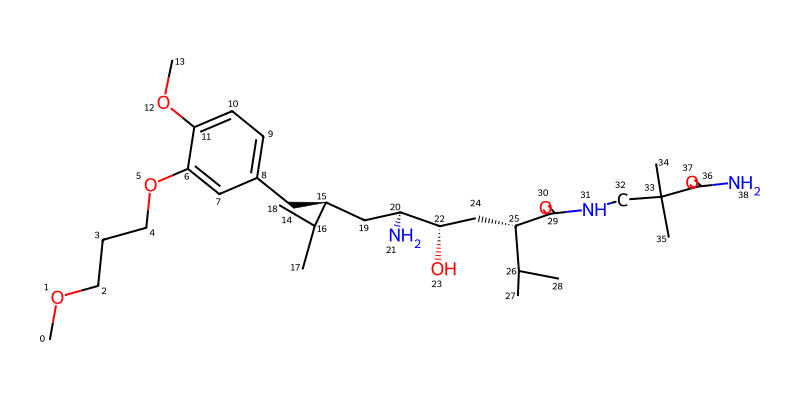

In [7]:
# Load the ligand file
ligand_c41 = Chem.MolFromMolFile("all_ligands_linked_to_protein/C41_ideal.sdf")
ligand_c41

In [8]:
#ligand for docking with hydrogens
os.makedirs("fixed_ligand_structure", exist_ok=True) # make modified ligand directory
# Select from directory
ligand_c41_h = Chem.MolFromMolFile("all_ligands_linked_to_protein/C41_ideal.sdf", removeHs=False) 
# Save the modified ligand with hydrogens to a new file
Chem.MolToMolFile(ligand_c41_h, "fixed_ligand_structure/C41_with_Hs.sdf") 


[15:11:52] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


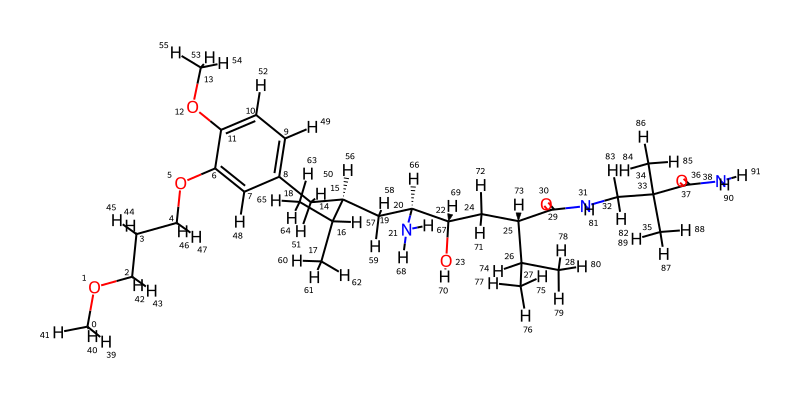

In [9]:
# Load the modified ligand with hydrogens
ligand_c41_hse = Chem.MolFromMolFile("fixed_ligand_structure/C41_with_Hs.sdf", removeHs=False) 
ligand_c41_hse

# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">6. The Sixth Step | Find Specific protein And Ligand That Linked Together</p>

In [10]:
EC_namber = "3.4.23.15" #EC number for a protease
query_1 = attrs.rcsb_polymer_entity.rcsb_ec_lineage.id == EC_namber # Query for a specific EC number
query_2 = TextQuery("C41") # Query for find renin structures with C41 ligand
query = query_1 & query_2 # Combine the two queries
results = list(query()) # "structures from EC Number "
print(f"Your protein with C41 ligand is exists in {results} ID") # Print the specific result

Your protein with C41 ligand is exists in ['2V0Z'] ID


In [11]:
# Get PDB id from the list and convert it to lowercase
pdb_id = results[0].lower()
# Print pdb id
print(pdb_id)

2v0z


# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">7. The Seventh Step | Make Directory and Download Specific protein/Ligand</p>

In [12]:
# Make directory name for pdb file
protein_folder_name = "protein_structure"
# Make directory
os.makedirs(protein_folder_name, exist_ok=True)

In [13]:
# Request the PDB file from the RCSB PDB REST API
pdb_request = requests.get(f"https://files.rcsb.org/download/{pdb_id}.pdb")
# Response status code for  get info from the server successfully
pdb_request.status_code

200

In [14]:
# Save the PDB file to the directory
with open(f"{protein_folder_name}/{pdb_id}.pdb", "w+") as file:
    file.write(pdb_request.text)

# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">8. The Eighth Step | Analysis Protein/Ligand in PDB File For Extract Pure Protein And Ligand </p>

In [15]:
# Get info from the PDB file
pdb_file = mda.Universe(f"{protein_folder_name}/{pdb_id}.pdb") # Load the PDB file into MDAnalysis
# Print the number of atoms in the PDB file
print(f"Number of atoms in the PDB file: {len(pdb_file.atoms)}") # Print the number of atoms
# Print the number of residues in the PDB file
print(f"Number of residues in the PDB file: {len(pdb_file.residues)}") # Print the number of residues
# Print the number of atoms in the first 6 residues
print(f"Number of atoms in the first residue: {len(pdb_file.residues[0].atoms)}") # Print the number of atoms in the first residue
print(f"Number of atoms in the second residue: {len(pdb_file.residues[1].atoms)}") # Print the number of atoms in the first residue
print(f"Number of atoms in the third residue: {len(pdb_file.residues[2].atoms)}") # Print the number of atoms in the first residue
print(f"Number of atoms in the forth residue: {len(pdb_file.residues[3].atoms)}") # Print the number of atoms in the first residue
print(f"Number of atoms in the fifth residue: {len(pdb_file.residues[4].atoms)}") # Print the number of atoms in the first residue
print(f"Number of atoms in the sixth residue: {len(pdb_file.residues[5].atoms)}") # Print the number of atoms in the first residue
# Print the number of segments in the PDB file
print(f"Number of segments in the PDB file: {len(pdb_file.segments)}") # Print the number of segments
# Print the number of atoms in the first segment
print(f"Number of atoms in the {str(pdb_file.segments[0])[-2]} segment: {len(pdb_file.segments[0].atoms)}") # Print the number of atoms in the first segment
print(f"Number of atoms in the {str(pdb_file.segments[4])[-2]} segment: {len(pdb_file.segments[4].atoms)}") # Print the number of atoms in the first segment
print(f"Number of atoms in the {str(pdb_file.segments[2])[-2]} segment: {len(pdb_file.segments[2].atoms)}") # Print the number of atoms in the first segment
print(f"Number of atoms in the {str(pdb_file.segments[1])[-2]} segment: {len(pdb_file.segments[1].atoms)}") # Print the number of atoms in the first segment
print(f"Number of atoms in the {str(pdb_file.segments[5])[-2]} segment: {len(pdb_file.segments[5].atoms)}") # Print the number of atoms in the first segment
print(f"Number of atoms in the {str(pdb_file.segments[3])[-2]} segment: {len(pdb_file.segments[3].atoms)}") # Print the number of atoms in the first segment


Number of atoms in the PDB file: 5981
Number of residues in the PDB file: 1365
Number of atoms in the first residue: 8
Number of atoms in the second residue: 7
Number of atoms in the third residue: 8
Number of atoms in the forth residue: 4
Number of atoms in the fifth residue: 8
Number of atoms in the sixth residue: 7
Number of segments in the PDB file: 6
Number of atoms in the C segment: 2597
Number of atoms in the C segment: 352
Number of atoms in the C segment: 53
Number of atoms in the O segment: 2593
Number of atoms in the O segment: 333
Number of atoms in the O segment: 53


In [16]:
#dir(pdb_file) # List all attributes and methods of the pdb_file object

In [17]:
 # Select all protein atoms from the PDB file
protein = pdb_file.select_atoms("protein")
# Select a specific chain, for example, chain O
chain_O = pdb_file.select_atoms("segid O") 
 # Select a specific chain, for example, chain C
chain_C =pdb_file.select_atoms("segid C")
 # Select all ligand atoms from the PDB file
ligand_c41 = pdb_file.select_atoms("resname C41")
 # Select all water atoms from the PDB file 
ligand_nag = pdb_file.select_atoms("resname NAG")
 # Select all water atoms from the PDB file
water = pdb_file.select_atoms("resname HOH")
# Print the number of protein atoms
print(f"Number of protein atoms(all chains): {len(protein)}") 
 # Print the number of chain C atoms
print(f"Number of chain C atoms with ligans/water: {len(chain_C)}")
# Print the number of chain O atoms
print(f"Number of chain O atoms with ligans/water: {len(chain_O)}") 
# Print the number of ligand atoms
print(f"Number of C41 ligand atoms: {len(ligand_c41)}") 
# Print the number of other ligand atoms
print(f"Number of NAG ligand atoms: {len(ligand_nag)}")
# Print the number of water atoms
print(f"Number of water atoms: {len(water)}")
     

Number of protein atoms(all chains): 5190
Number of chain C atoms with ligans/water: 3002
Number of chain O atoms with ligans/water: 2979
Number of C41 ligand atoms: 78
Number of NAG ligand atoms: 28
Number of water atoms: 685


In [18]:
# Calculate the total number of atoms in all chains
total_atoms_in_chains = len(chain_C) + len(chain_O)

# Compare with the total number of protein atoms
print(f"Total atoms in chain_C and chain_O with ligands/water: {total_atoms_in_chains}")
print(f"Total protein atoms: {len(protein)}")

# Check if there are other chains or overlapping atoms
other_atoms = len(protein) - total_atoms_in_chains
print(f"Number of atoms not in chain_C or chain_O: {other_atoms} = Water:{len(water)}  +  C41 ligand:{len(ligand_c41)}  +  NAG ligand:{len(ligand_nag)}") # Print the number of atoms not in chain_C or chain_O

Total atoms in chain_C and chain_O with ligands/water: 5981
Total protein atoms: 5190
Number of atoms not in chain_C or chain_O: -791 = Water:685  +  C41 ligand:78  +  NAG ligand:28


In [19]:
# Select only protein atoms in chain C
protein_in_chain_C = pdb_file.select_atoms("protein and segid C")
protein_in_chain_O = pdb_file.select_atoms("protein and segid O")
ligand_c41_in_chain_C = pdb_file.select_atoms("resname C41 and segid C")
ligand_c41_in_chain_O = pdb_file.select_atoms("resname C41 and segid O")
water_in_chain_C = pdb_file.select_atoms("resname HOH and segid C")
water_in_chain_O = pdb_file.select_atoms("resname HOH and segid O")
# Print the number of protein atoms in chain C
print(f"Number of protein atoms in chain C: {len(protein_in_chain_C)}")
# Print the number of protein atoms in chain O
print(f"Number of protein atoms in chain O: {len(protein_in_chain_O)}")
# Print the total number of protein atoms in chain C and O
print(f"total number of protein atoms in chain C and O Without any ligands/water : {len(protein_in_chain_C) + len(protein_in_chain_O)}") 
print(f"ligand C41 in chain C: {len(ligand_c41_in_chain_C)}") # Print the number of ligand atoms in chain C
print(f"ligand C41 in chain O: {len(ligand_c41_in_chain_O)}") # Print the number of ligand atoms in chain O
print(f"total c41 ligand atoms in chain C and O: {len(ligand_c41_in_chain_C) + len(ligand_c41_in_chain_O)}") # Print the total number of ligand atoms in chain C and O
print(f"water in chain C: {len(water_in_chain_C)}") # Print the number of water atoms in chain C
print(f"water in chain O: {len(water_in_chain_O)}") # Print the number of water atoms in chain O    
print(f"total water in chain C and O: {len(water_in_chain_C) + len(water_in_chain_O)}") # Print the total number of water atoms in chain C and O

Number of protein atoms in chain C: 2597
Number of protein atoms in chain O: 2593
total number of protein atoms in chain C and O Without any ligands/water : 5190
ligand C41 in chain C: 39
ligand C41 in chain O: 39
total c41 ligand atoms in chain C and O: 78
water in chain C: 352
water in chain O: 333
total water in chain C and O: 685


# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">9. The Ninth Step | Visualization</p>

In [20]:
# Create a viewer for the PDB file
view = nv.show_mdanalysis(pdb_file) # Create a viewer for the PDB file using MDAnalysis
view

NGLWidget()

In [21]:
protein_view = nv.show_mdanalysis(protein_in_chain_C) # create a viewer for the protein in chain C
protein_view.clear_representations() # Clear previous representations
protein_view.add_representation("surface", colorScheme="hydrophobicity") # Add a cartoon representation for hydrophobic residues
protein_view

NGLWidget()

In [22]:
ligand_view = nv.show_mdanalysis(ligand_c41_in_chain_C) # create a viewer for the ligand
ligand_view.clear_representations() # Clear previous representations
ligand_view.add_representation("ball+stick", colorScheme="element") # Add a ball-and-stick representation for the ligand
ligand_view

NGLWidget()

In [23]:
water_view = nv.show_mdanalysis(water_in_chain_C) # create a viewer for the water
water_view.clear_representations() # Clear previous representations
water_view.add_representation("spacefill") # Add a ball-and-stick representation for the water
water_view

NGLWidget()

In [24]:
protein_view = nv.show_mdanalysis(protein_in_chain_C) # create a viewer for the protein in chain C
protein_view.clear_representations() # Clear previous representations
protein_view.add_representation("cartoon", colorScheme="hydrophobicity") # Add a cartoon representation for hydrophobic residues
ligan_view = protein_view.add_component(ligand_c41_in_chain_C) # Add the ligand view to the protein view
ligand_view.add_representation("ball+stick") # Add a ball-and-stick representation for the ligand
# protein_view.update_representation(component=1, repr_index=0, color="green") # Update the ligand representation to be red
protein_view

NGLWidget()

In [25]:
# Save the chain C protein to a PDB file
protein_in_chain_C.write(f"{protein_folder_name}/pure_protein_{pdb_id}.pdb") 

In [26]:
protein_folder_name = "protein_structure" # Directory where the PDB file is saved
pdb_id = "2v0z" # Example PDB ID
path_of_pure_protein_pdb_file = f"{protein_folder_name}/pure_protein_{pdb_id}.pdb" # Path to the PDB file
# Show all molecules with cartoon shape
view = nv.show_file(path_of_pure_protein_pdb_file)
view.clear_representations()
view.add_representation("cartoon")
# Highlight around missing residue by red color
view.add_representation("licorice", selection="Atom 160", color="red")    
view.add_representation("licorice", selection="Atom 159", color="red")   
view

NGLWidget()

# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">10. The Tenth Step  | Fix Missing Residue of Protein</p>

In [27]:
# Make directory name for pdb file
protein_folder_name = "fixed_protein_structure"
# Make directory
os.makedirs(protein_folder_name, exist_ok=True)

In [28]:
# Create function to fix PDB file
def fix_pdb(pdb_file_path, output_pdb_path):
    """
    Fixes missing residues and other issues in a PDB file using PDBFixer.

    Args:
        pdb_file_path (str): Path to the input PDB file.
        output_pdb_path (str): Path to save the fixed PDB file.
    """
    fixer = PDBFixer(filename=pdb_file_path)
    fixer.findMissingResidues() # Find missing residues in the PDB file
    fixer.findNonstandardResidues() # Find non-standard residues in the PDB file
    fixer.replaceNonstandardResidues() # Replace non-standard residues with standard ones
    fixer.removeHeterogens(keepWater=False) # Remove heterogens (non-standard residues) from the PDB file, keeping water molecules
    fixer.findMissingAtoms() # Find missing atoms in the PDB file
    fixer.addMissingAtoms() # Add missing atoms to the PDB file
    fixer.addMissingHydrogens(7.4) # Add missing hydrogens to the PDB file at pH 7.4
    # Write the fixed PDB file to the specified output path
    with open(output_pdb_path, 'w') as f:
        PDBFile.writeFile(fixer.topology, fixer.positions, f)
    print(f"Fixed PDB file saved to {output_pdb_path}") # Print a success message

# Create directory
input_protein_pdb = 'protein_structure/pure_protein_2v0z.pdb'
output_fix_protein_pdb = 'fixed_protein_structure/pure_protein_2v0z_fix_structure.pdb'
# Call the function to fix the PDB file
fix_pdb(input_protein_pdb, output_fix_protein_pdb)

Fixed PDB file saved to fixed_protein_structure/pure_protein_2v0z_fix_structure.pdb


In [29]:

# Show the fixed structure
view = nv.show_file("fixed_protein_structure/pure_protein_2v0z_fix_structure.pdb")
view.clear_representations()
view.add_representation("cartoon")
view

NGLWidget()

# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">11. The Eleventh Step | Convert PDB To PDBQT</p>

In [30]:
# Make directory name for pdb file
protein_folder_name = "protein_and_ligand_structure_for_docking_with_Vina"
# Make directory
os.makedirs(protein_folder_name, exist_ok=True)

In [31]:
# Convert PDB file to PDBQT format using Open Babel
def convert_pdb_to_pdbqt(input_pdb, output_pdbqt):
    """ This function converts a PDB file to PDBQT format using Open Babel.
    Args:
        input_pdb (str): Path to the input PDB file.
        output_pdbqt (str): Path to save the output PDBQT file.
    """
    conversion_protein = openbabel.OBConversion() # Create an OBConversion object for conversion
    conversion_protein.SetInAndOutFormats("pdb", "pdbqt") # Set input and output formats for conversion
    molecule_protein = openbabel.OBMol() # Create an OBMol object to hold the molecule data
    # Read the input PDB file into the OBMol object
    conversion_protein.ReadFile(molecule_protein, input_pdb)

    # Add hydrogens and compute charges
    molecule_protein.AddHydrogens() # Add hydrogens to the molecule
    openbabel.OBChargeModel.FindType("eem").ComputeCharges(molecule_protein) # Compute charges using the EEM charge model
    # Write the converted PDBQT file
    conversion_protein.WriteFile(molecule_protein, output_pdbqt)
    print(f"Converted {input_pdb} to {output_pdbqt}") # Print a success message

# Create directory
input_protein_pdb_file = "fixed_protein_structure/pure_protein_2v0z_fix_structure.pdb"
output_protein_pdbqt_file = "protein_and_ligand_structure_for_docking_with_Vina/Renin_Protein.pdbqt"

# Call the function to convert the PDB file to PDBQT format
convert_pdb_to_pdbqt(input_protein_pdb_file, output_protein_pdbqt_file)


Converted fixed_protein_structure/pure_protein_2v0z_fix_structure.pdb to protein_and_ligand_structure_for_docking_with_Vina/Renin_Protein.pdbqt


# <p style="background-color:black; font-family:calibri; color:#FF00FF; font-size:170%; text-align:center; border-radius:30px 30px;">12. The Twelfth Step | Convert SDF To PDBQT</p>

In [32]:
# Create function for covert SDF to PDBQT
def convert_sdf_to_pdbqt(input_sdf, output_pdbqt):
    """This function converts an SDF file to PDBQT format using Open Babel.
    Args:
        input_sdf (str): Path to the input SDF file.
        output_pdbqt (str): Path to save the output PDBQT file.
    """
    Conversion_ligand = openbabel.OBConversion() # Create an OBConversion object for conversion
    Conversion_ligand.SetInAndOutFormats("sdf", "pdbqt") # Set input and output formats for conversion
    molecule_ligand = openbabel.OBMol() # Create an OBMol object to hold the molecule data
    Conversion_ligand.ReadFile(molecule_ligand, input_sdf) # Read the input PDB file into the OBMol object

    # Add hydrogens and compute charges
    molecule_ligand.AddHydrogens() # # Add hydrogens to the molecule
    openbabel.OBChargeModel.FindType("eem").ComputeCharges(molecule_ligand) # Compute charges using the EEM charge model
    # Write the converted PDBQT file
    Conversion_ligand.WriteFile(molecule_ligand, output_pdbqt)
    print(f"Converted {input_sdf} to {output_pdbqt}") # Print a success message
    
# Create directory
input_ligand_sdf_file = "fixed_ligand_structure/C41_with_Hs.sdf"
output_ligand_pdbqt_file = "protein_and_ligand_structure_for_docking_with_Vina/C41_Ligand.pdbqt"

# Call the function to convert the SDF file to PDBQT format
convert_sdf_to_pdbqt(input_ligand_sdf_file, output_ligand_pdbqt_file)

Converted fixed_ligand_structure/C41_with_Hs.sdf to protein_and_ligand_structure_for_docking_with_Vina/C41_Ligand.pdbqt
